# Pymaceuticals Inc.

# Backgrounder

Pymaceuticals, Inc. is a new pharmaceutical company that specializes in anti-cancer medications.

- Began screening for potential treatments for squamous cell carcinoma (SCC), 
 a commonly occurring form of skin cancer.

- 249 mice who were identified with SCC tumors received treatment with a range of drug regimens.

- Over the course of 45 days, tumor development was observed and measured. 

The study aims to compare the performance of Pymaceuticals’ drug of interest, Capomulin, 
against the other treatment regimens. 



# Objectives
- Generate all of the tables and figures needed for the technical report of the clinical study
- Present the top-level summary of the study results

# Methods
Data aggregation, data visualization and statistics
    


### Analysis

Based on the data generated 230 mice were treated using drug regimen Capomulin which is the highest count, followed by Ramicane, 228; Ketapril, 188; Naftisol, 186; Zoniferol, 182;Placebo, 181; Stelasyn, 181; Ceftamin, 178; Infubinol, 178; and last is Propriva, 161. 

It can be observed that the mice sample population treated were 124 females (49.8%) and 125 males (50.2%)

Out of four of the most promising treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin; 
Capomulin and Ramicane showed that they have the lowest final tumor volume(mm3) after the duration of the treatment as shown on boxplot(Tumor Volume for each Mouse).
The median of Capomulin tumors: 38.1251644. The median of Ramicane tumors is: 36.56165229 

The linear correlation, also called Pearson’s Correlation Coefficient(r) between mouse weight and the average tumor volume is 0.84.
Based on Pearson's Correlation table, 0.84 is > 0.7, means there is a strong positive correlation between two variables (mouse weight and the average tumor volume). As the mouse weight changes, the average tumor volume changes. 

Relying on the regression analysis, it helped to determined how the average tumor volume influenced the weight of mice change. 
The R-squared value is 0.70, which indicates that the model closely tracks the data, wich is fairly  good. 



In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [105]:
# Checking the number of mice.
mice=combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [106]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [107]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id=combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [109]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen


regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem



Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [111]:
summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats_table

summary_stats_table.to_csv("fileOne.csv", index=False, header=True)

In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
single_group_by = clean_df.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

In [113]:
# Sort
count_mice_per_treatment_sorted_desc = count_mice_per_treatment.sort_values(ascending=False)
count_mice_per_treatment_sorted_desc

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Mouse ID, dtype: int64

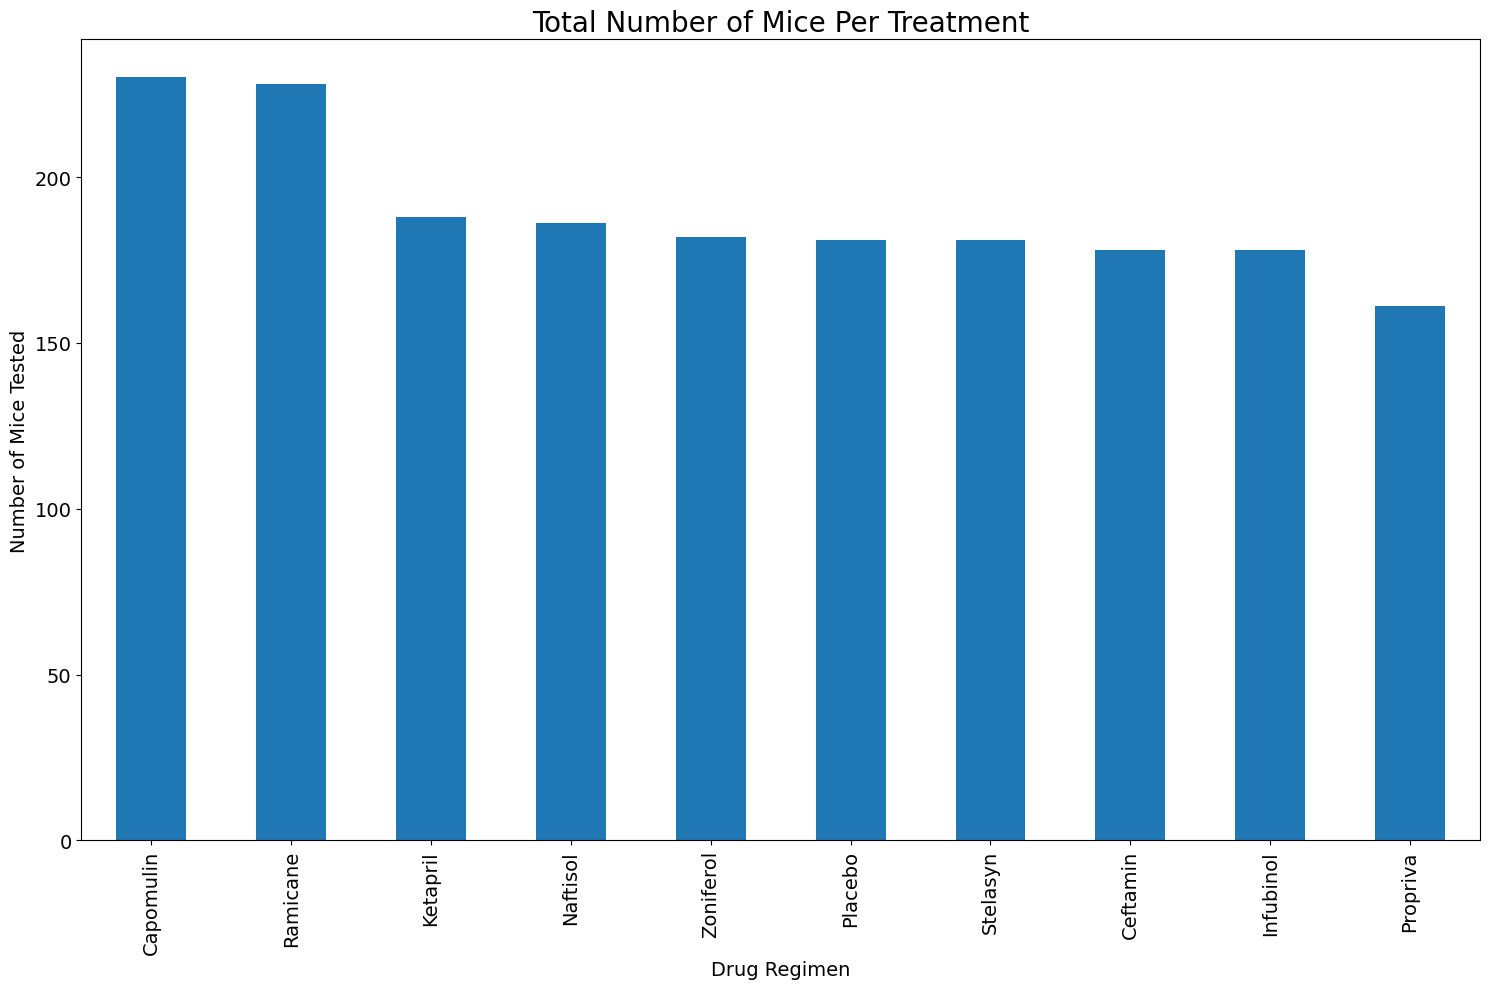

In [114]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

count_mice_per_treatment = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = count_mice_per_treatment_sorted_desc.plot.bar(figsize=(15,10), color='C0',fontsize = 14 )

plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice Tested",fontsize = 14)
plt.title("Total Number of Mice Per Treatment",fontsize = 20)

plt.savefig("Total Number of Mice Per Treatment", bbox_inches = "tight")
plt.tight_layout()
plt.show()



In [115]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create an array that contains the number of mice each drug regimen has

mice_list =(combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list.sort(reverse=True)
print(mice_list)

[230, 228, 188, 186, 182, 181, 181, 178, 178, 161]


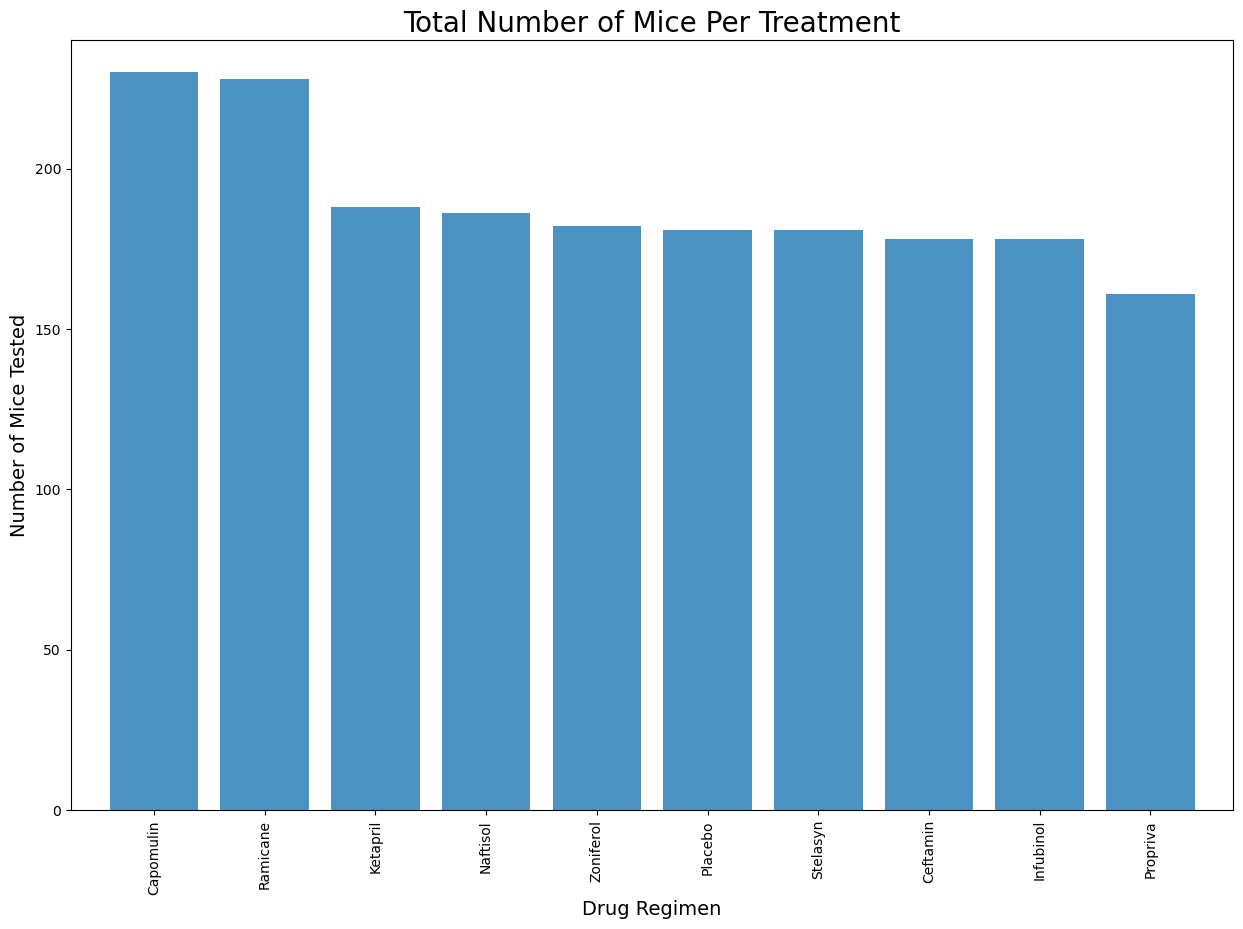

In [116]:
x_axis = np.arange(len(count_mice_per_treatment))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_list, color='C0', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Ceftamin','Infubinol','Propriva'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Total Number of Mice Per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice Tested",fontsize = 14)

plt.savefig("Total Number of Mice Per Treatment", bbox_inches = "tight")

In [117]:
#  Group by gender and get the number to plot
groupby_gender = combined_data.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


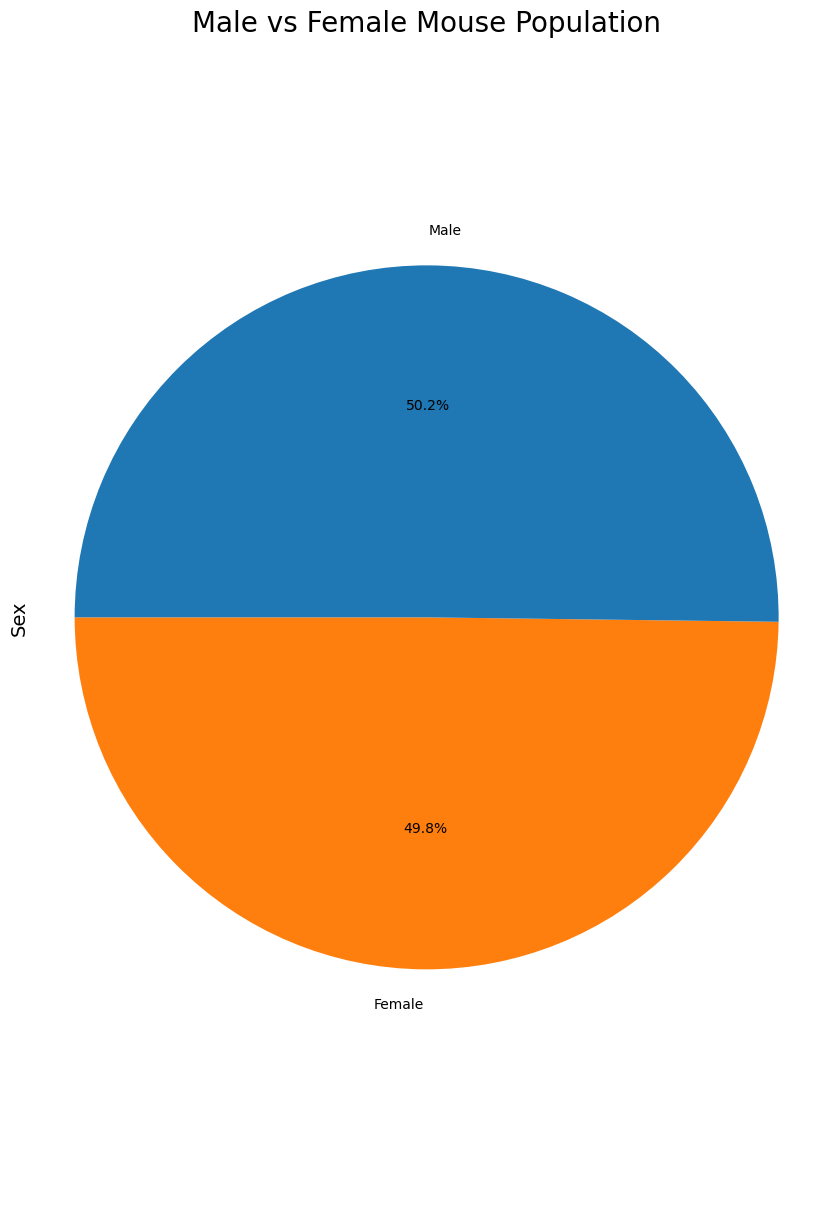

In [118]:
#  Generate a pie plot showing the distribution of female versus male mice us
colors = ['C1', 'C0']
explode = (0,0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,15), colors = colors, startangle=180, explode = explode, autopct="%1.1f%%", legend=None)




plt.title('Male vs Female Mouse Population', fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("Male vs Female Mouse Population", bbox_inches = "tight")
plt.show()

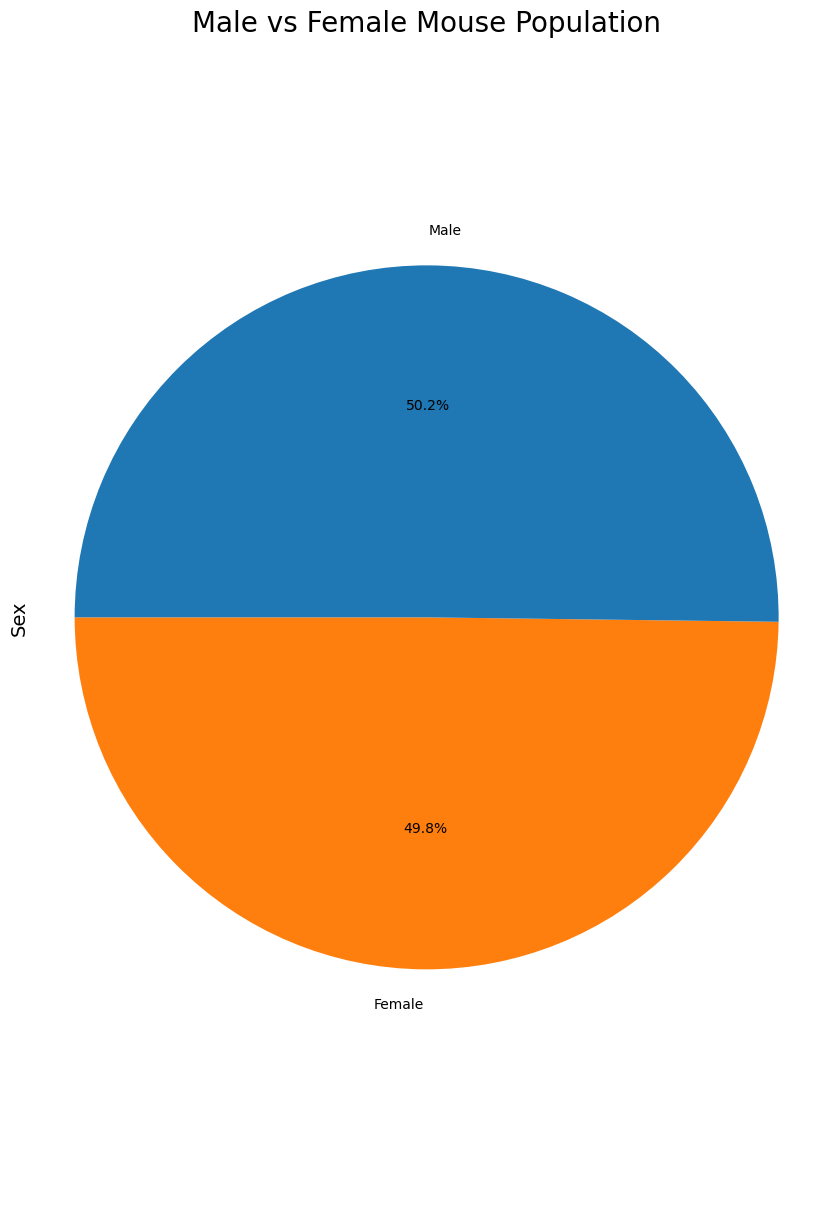

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplo

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['C1', 'C0']

#Determoine which section of the circle to detach
explode = (0, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(10,15))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", startangle=180,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
#Set equal axis
plt.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("Male vs Female Mouse Population",  bbox_inches = "tight")
plt.show()

# Quartiles, Outliers and Boxplots

In [120]:
# Final tumor volume of each mouse across four of the most promising treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine 
# if there are any potential outliers across all four treatment regimens.

Capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]

# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [121]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [122]:
# Ramicane

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")

In [123]:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [124]:
# Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [125]:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [126]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [127]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


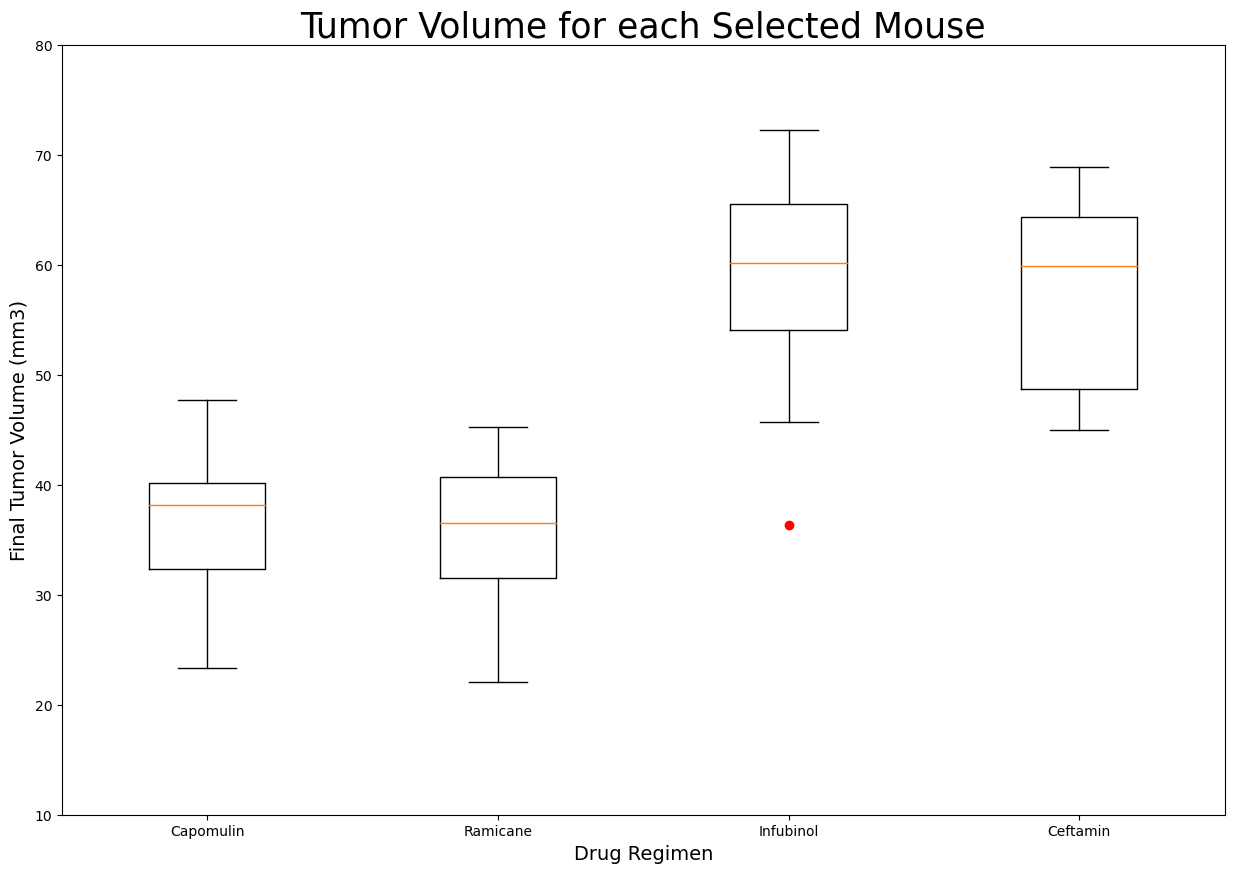

In [128]:
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume for each Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, sym = 'ro', vert=True)

plt.ylim(10, 80)

plt.savefig("Tumor Volume for each Selected Mouse", bbox_inches = "tight")

plt.show()

# Line and Scatter Plots

In [129]:
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


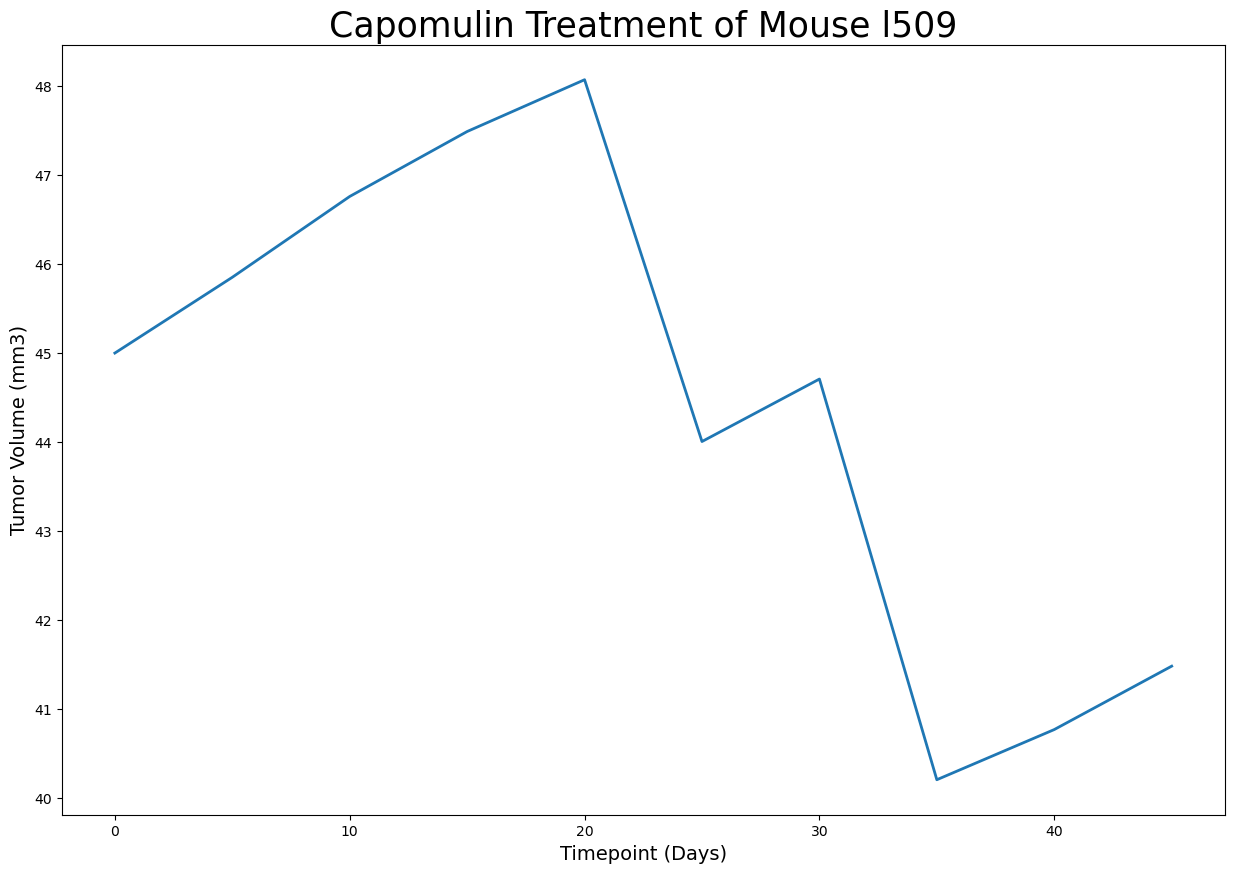

In [130]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis = forline_df["Timepoint"]
tumor_size = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin Treatment of Mouse l509',fontsize =25)
plt.plot(x_axis, tumor_size,linewidth=2, markersize=15,color="C0", label="Fahrenheit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


plt.savefig("Capomulin Treatment of Mouse l509", bbox_inches = "tight")
plt.show()

# Correlation and Regression

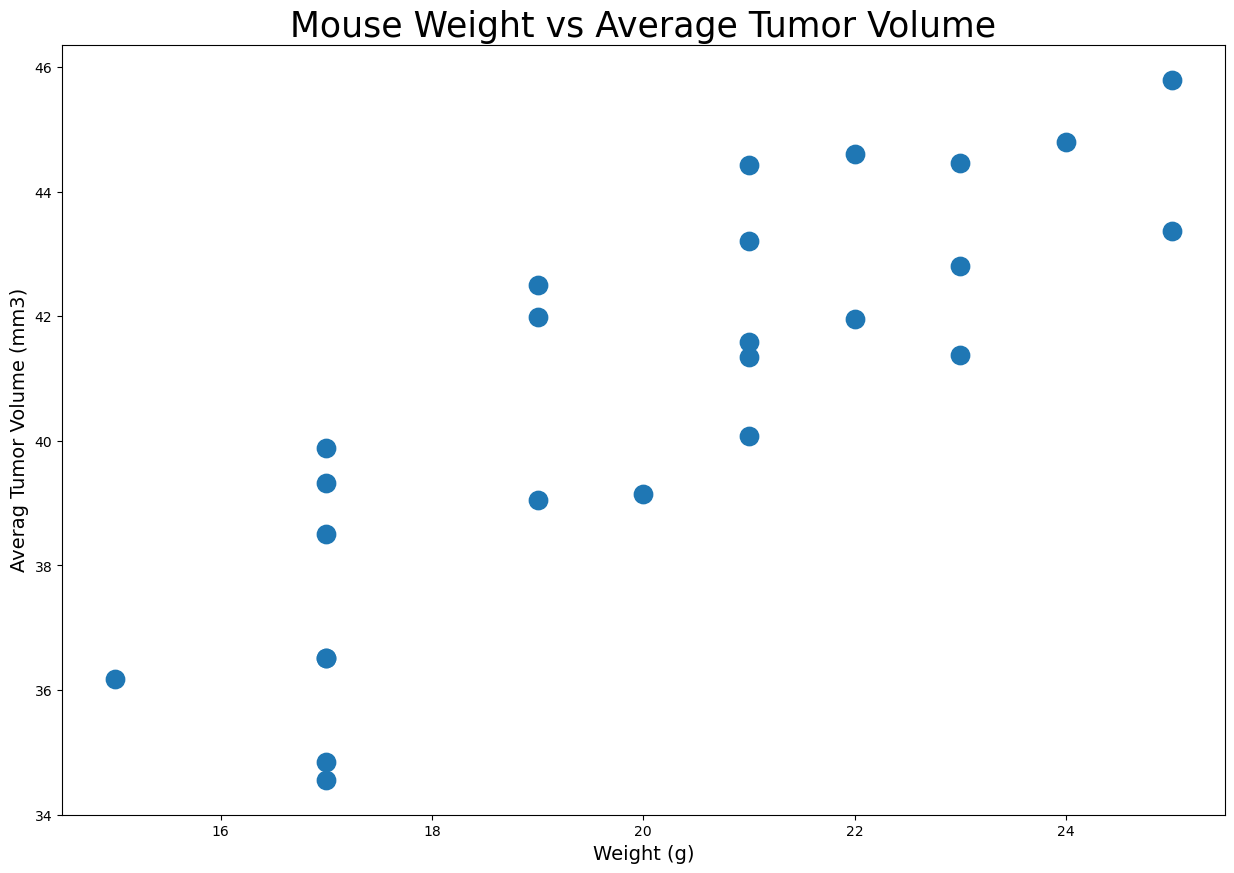

In [131]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

fig1, ax1 = plt.subplots(figsize=(15, 10))
ave_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(ave_capm_vol['Weight (g)'],ave_capm_vol['Tumor Volume (mm3)'],s=175, color="C0")
plt.title('Mouse Weight vs Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


plt.savefig("Mouse Weight vs Average Tumor Volume", bbox_inches = "tight")
plt.show()

In [132]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(ave_capm_vol['Weight (g)'],ave_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [133]:
x_values = ave_capm_vol['Weight (g)']
y_values = ave_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241049
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
pandas (Correlation coefficient):0.84
stderr:0.12754359033201323
y = 0.95x + 21.55


The r-squared is: 0.7088568047708723


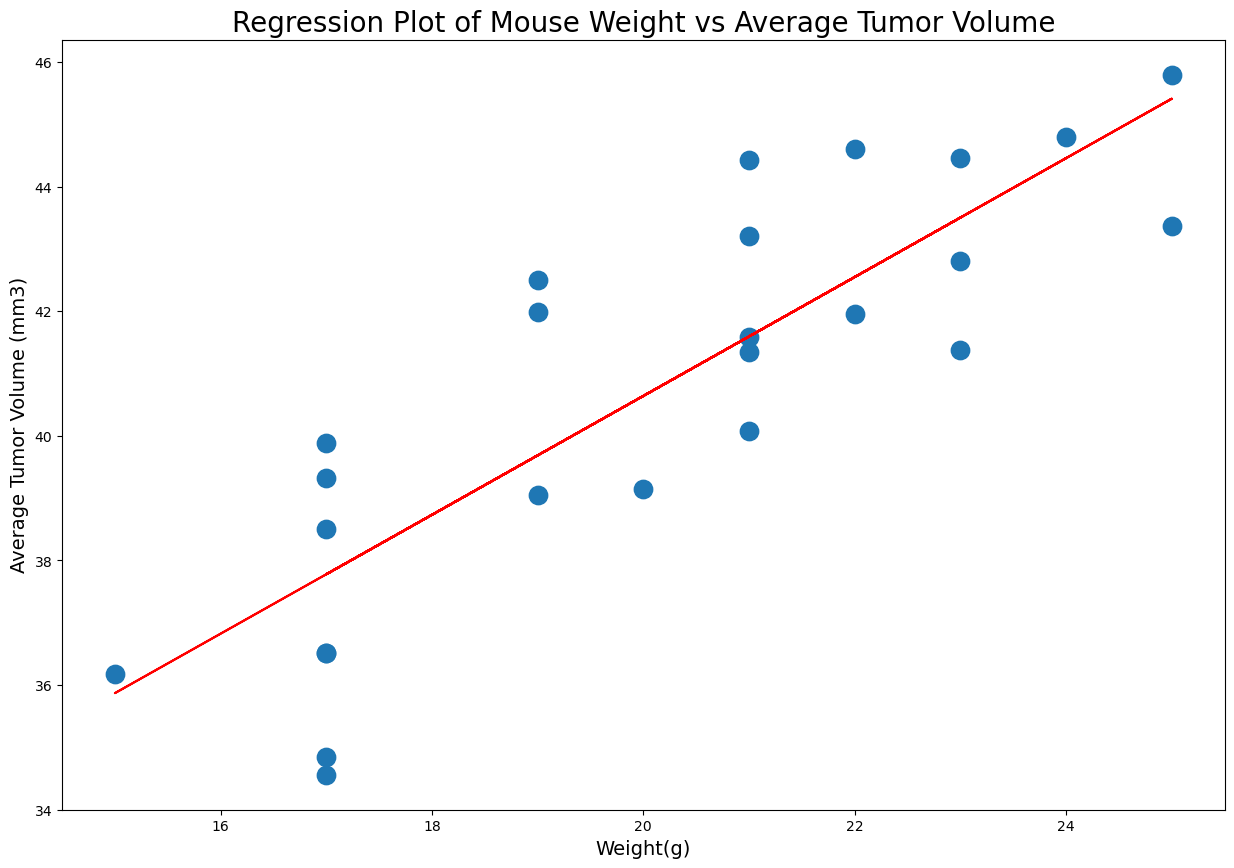

In [134]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="C0")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight vs Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)


print(f"The r-squared is: {rvalue**2}")

plt.savefig("Regression Plot of Mouse Weight vs Average Tumor Volume", bbox_inches = "tight")
plt.show()